In [1]:
import numpy as np
import pandas as pd

In [2]:
dic={'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

In [3]:
ls

Overfitting_Demo_Ridge_Lasso.ipynb     wk3_kc_house_set_2_data.csv
kc_house_data.csv*                     wk3_kc_house_set_3_data.csv
kc_house_data.gl/                      wk3_kc_house_set_4_data.csv
kc_house_test_data.csv*                wk3_kc_house_test_data.csv*
kc_house_train_data.csv*               wk3_kc_house_train_data.csv*
week4 assignment 2.ipynb               wk3_kc_house_train_valid_shuffled.csv
week4 assignments 1.ipynb              wk3_kc_house_valid_data.csv*
wk3_kc_house_set_1_data.csv


In [4]:
alldata=pd.read_csv('kc_house_data.csv',dtype=dic)
train=pd.read_csv('kc_house_train_data.csv',dtype=dic)
test=pd.read_csv('kc_house_test_data.csv',dtype=dic)

In [5]:
def get_numpy_data(data,features,output):
    data['constant'] = 1
    features = ['constant'] + features
    featuredata=data[features]
    features_matrix=featuredata.values
    outdata=data[output]
    output_array =outdata.values
    return(features_matrix, output_array)

In [6]:
def predict_output(feature_matrix, weights):               # predict outcomes
    predictions=np.dot(feature_matrix, weights)
    return predictions

In [7]:
def feature_derivative_ridge(errors, feature, weight, l2_penalty, feature_is_constant):
    if feature_is_constant == True:
        derivative=2.0*np.dot(feature,errors)
    else :
        derivative=2.0*np.dot(feature,errors) + 2.0*l2_penalty*weight    
    return derivative

In [8]:
def ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size, l2_penalty, max_iterations):
    weights = np.array(initial_weights) # make sure it's a numpy array
    m=0
    while m<max_iterations:
        predict=predict_output(feature_matrix, weights) 
        errors=predict-output
        for i in xrange(len(weights)): 
            if (i==0):
                derivative=feature_derivative_ridge(errors,feature_matrix[:,i], weights[i], l2_penalty,True)
            else:
                derivative=feature_derivative_ridge(errors,feature_matrix[:,i], weights[i], l2_penalty,False)
            weights[i]=weights[i]-step_size*derivative
        m=m+1    
    return weights

In [9]:
simple_features = ['sqft_living']
my_output = 'price'

In [10]:
(simple_feature_matrix, output) = get_numpy_data(train, simple_features, my_output)
(simple_test_feature_matrix, test_output) = get_numpy_data(test, simple_features, my_output)

In [11]:
initial_weights = np.array([0., 0.])
step_size = 1e-12
max_iterations=1000

In [12]:
l2_penalty=0.0
simple_weights_0_penalty=ridge_regression_gradient_descent(simple_feature_matrix, output, initial_weights, step_size, l2_penalty, max_iterations)

In [13]:
simple_weights_0_penalty

array([ -1.63113515e-01,   2.63024369e+02])

In [14]:
l2_penalty=1e11
simple_weights_high_penalty=ridge_regression_gradient_descent(simple_feature_matrix, output, initial_weights, step_size, l2_penalty, max_iterations)

In [15]:
from sklearn import linear_model
import numpy as np
model = linear_model.Ridge(alpha=0.0, normalize=True)
model.fit(train[['sqft_living']], train[['price']])

Ridge(alpha=0.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, solver='auto', tol=0.001)

In [16]:
model.coef_

array([[ 281.95883963]])

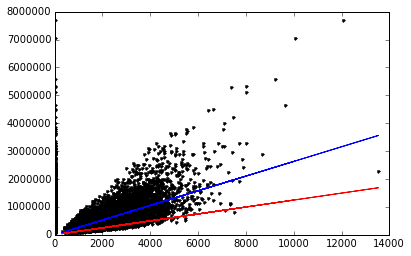

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(simple_feature_matrix,output,'k.',
        simple_feature_matrix,predict_output(simple_feature_matrix, simple_weights_0_penalty),'b-',
        simple_feature_matrix,predict_output(simple_feature_matrix, simple_weights_high_penalty),'r-')

In [18]:
print simple_weights_0_penalty,simple_weights_high_penalty

[ -1.63113515e-01   2.63024369e+02] [   9.76730382  124.57217567]


In [19]:
np.sum((predict_output(simple_test_feature_matrix,simple_weights_0_penalty)-test_output)**2)

275723632153607.44

In [20]:
model_features = ['sqft_living', 'sqft_living15']
my_output = 'price'
(feature_matrix, output) = get_numpy_data(train, model_features, my_output)
(test_feature_matrix, test_output) = get_numpy_data(test, model_features, my_output)

In [21]:
initial_weights = np.array([0., 0.,0.])
step_size = 1e-12
max_iterations = 1000

In [22]:
l2_penalty=0.0
simple_weights_0_penalty=ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size, l2_penalty, max_iterations)

In [23]:
l2_penalty=1e11
simple_weights_high_penalty=ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size, l2_penalty, max_iterations)

In [24]:
print simple_weights_0_penalty,simple_weights_high_penalty

[  -0.35743483  243.05416982   22.41481497] [  6.74296579  91.48927365  78.43658766]


In [25]:
np.sum((predict_output(test_feature_matrix,simple_weights_0_penalty)-test_output)**2)

274067615918575.56

In [28]:
predict_output(test_feature_matrix,simple_weights_0_penalty)

array([ 387465.47605824,  764977.14757579,  438709.53237955, ...,
        668981.48424192,  602473.88624925,  270778.00705338])

In [29]:
predict_output(test_feature_matrix,simple_weights_high_penalty)

array([ 270453.53032194,  437754.39782438,  237243.08619562, ...,
        428219.91346819,  354885.92051458,  173331.12150247])

In [30]:
test_output

array([ 310000.,  650000.,  233000., ...,  610685.,  400000.,  402101.])